# Finding Best Markets To Advertize In

![](Data.jpg)

## Project Goal

**Fiction:** I'm going to write this up as a fictional assignment.

**Description:**
I work for an e-learning company that offers courses on programming. **Most of our courses are on web and mobile development**, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. **<span style="color:blue">Our goal in this project is to find out the two best markets to advertise our product in</span>**.

I was handed a wheelbarrow load of survey based data by our marketing senior management team. The commission was: **<span style="color:red">'Here, analyze this</span>**. We have a limited amount of advertising dollars in our budget. Find out from the data the two best markets for us to advertise in and capture a high influx of new customers for e-learning training. **Have it done before we get back from our 'Communication Training'!**

Well, after I cleaned and massaged the data for hours ending up with a small percent of the original data; I thought, couldn't I have been given the task after the senior management's 'Communication Training'. In light of that, **<span style="color:red">this is how I sort of now feel</span>**.

![](Marketing%20Mgr2.jpg)


## Introduction

To reach this project goal (defined further below), we could organize surveys for a couple of different markets to find out which would be the best choices for advertising. This is very costly. It may be a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp\'s 2017 New Coder Survey. freeCodeCamp](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/ 'freeCodeCamp\'s 2017 New Coder Survey. freeCodeCamp') which is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey 'GitHub repository').

## Analysis Sequence


-**Job Type Interests**

-**Current Country Residence**

-**Training Dollar Investment**

## Import the Raw Data

In [1]:
# import raw data and relevant libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
import seaborn as sns
import emoji
np.warnings.filterwarnings('ignore')

code_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
print('Original File')
print('_____________', '\n')
print(code_survey.head(3), '\n', '\n')

# trim the data file down to only columns that appear to be relevant to the project objective.
cols = ['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
        'BootcampName', 'BootcampRecommend', 'CountryLive', 'ExpectedEarning',
        'FirstDevJob', 'Gender', 'HoursLearning', 'Income', 'JobInterestBackEnd',
        'JobInterestDataEngr', 'JobInterestDataSci', 'JobInterestDevOps',
        'JobInterestFrontEnd', 'JobInterestFullStack', 'JobInterestGameDev',
        'JobInterestInfoSec', 'JobInterestMobile', 'JobInterestProjMngr',
        'JobInterestQAEngr', 'JobInterestUX', 'JobPref', 'JobRoleInterest',
        'LanguageAtHome', 'MoneyForLearning', 'MonthsProgramming',
        'SchoolDegree', 'SchoolMajor']

code_survey2 = code_survey[cols]
pd.set_option('display.max_colwidth', 31)
print('Trimmed File')
print('_____________', '\n')
print(code_survey2.head(3))

Original File
_____________ 

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber       CityPopulation  \
0                NaN             NaN  more than 1 million   
1                NaN             NaN    less than 100,000   
2                NaN             NaN  more than 1 million   

   CodeEventConferences  CodeEventDjangoGirls  ...  YouTubeFCC  \
0                   NaN                   NaN  ...         NaN   
1                   NaN                   NaN  ...         1.0   
2                   NaN                   NaN  ...         NaN   

   YouTubeFunFunFunction  YouTubeGoogleDev  YouTubeLearnCode  \
0                    NaN               NaN               NaN   
1                    Na

## Observations

The survey file read in has 136 columns and 18174 rows (excluding heading row).

I initially executed the print command **<span style="color:red">\'print(code_survey.info(verbose=True)\'</span>** so I could see all columns and discern by titles whether they would be relevant to accomplish the project objective.

I trimmed down the original file from 136 columns to 31. As I proceed through this project I will determine if I'm missing any key columns. After trimming the file, I removed the command **<span style="color:red">\'print(code_survey.info(verbose=True)\'</span>** to reduce the size of subsequent output.

### Job Role Interest

There are 11 different types of job descriptions associated with computer programming training. Let's see what job types most of the survey respondents were leaning towards by means of their training.

In [2]:

pd.set_option('display.max_colwidth', 50)

# observe number of missing values.
pd.set_option('display.max_rows', 10)
print(code_survey2['JobRoleInterest'].value_counts(sort=True, dropna=False), '\n')
pd.reset_option('max_rows')
print(len(code_survey2), '\n')

# remove missing values from column.
# JRI = Job Role Interest
JRI = code_survey2['JobRoleInterest'].dropna()
print(len(JRI), '\n')

print('There are 11183 missing values out of 18174 rows in \'JobRoleInterest\' column')
print(round(100 - (len(JRI)*100) / (len(code_survey2)), 2),
      '% of the responders did not identify any specific job interests')
print('That leaves only 6,991 rows available to analyze.', '\n')

print(JRI.value_counts(sort=True, dropna=False), '\n')
pd.set_option('display.max_colwidth', 200)
print(code_survey2.iloc[2:4, 25], '\n')

print(code_survey2.iloc[2:4, 12:23])
pd.reset_option('max_colwidth')

NaN                                                                                                                                                       11183
Full-Stack Web Developer                                                                                                                                    823
  Front-End Web Developer                                                                                                                                   450
  Data Scientist                                                                                                                                            152
Back-End Web Developer                                                                                                                                      142
                                                                                                                                                          ...  
  Product Manager,   Quality Assurance E

## Interesting Observation

The survey file includes 11 columns as shown below with each one relating to a specific job type that computer programming training could lead to. The survey responders were given opportunity to identify not just one of the job types they are interested in, but any number of the listed choices including all of them.

There were in fact some cases where respondents selected all 11. Why that is, I can't say for sure. Maybe they were still early in their training and weren't sure what career direction to pursue or they may have worked in all 11 categories at some time in the working career or ... whatever.

**Separate Job Interest Type Columns**

- <span style="color:blue">12 JobInterestBackEnd       3201 non-null   float64</span>
- <span style="color:blue">13  JobInterestDataEngr     1470 non-null   float64</span>
- <span style="color:blue">14  JobInterestDataSci      1940 non-null   float64</span>
- <span style="color:blue">15  JobInterestDevOps       1092 non-null   float64</span>
- <span style="color:blue">16  JobInterestFrontEnd     4047 non-null   float64</span>
- <span style="color:blue">17  JobInterestFullStack    4831 non-null   float64</span>
- <span style="color:blue">18  JobInterestGameDev      1875 non-null   float64</span>
- <span style="color:blue">19  JobInterestInfoSec      1560 non-null   float64</span>
- <span style="color:blue">20  JobInterestMobile       2677 non-null   float64</span>
- <span style="color:blue">21  JobInterestProjMngr     939 non-null    float64</span>
- <span style="color:blue">22  JobInterestQAEngr       584 non-null    float64</span>

**<span style="color:blue">Discovery:</span>** I noticed that the **<span style="color:red">\'JobRoleInterest\'</span>** column is simply a conglomeration of the 11 columns above according to each respondent's selection. Some respondents indicated they were interested in only one job type and other respondents indicated they were interested in several job types. We'll look at the distribution of respondent choices later in this project.  

**Conglomerated Job Interest Column**

- <span style="color:red">25  JobRoleInterest       6992 non-null   object</span> 

**Proof of Discovery:**

- Let's look at the respondent job type interest output from two individuals identified below as index numbers 2 (blue) and 3 (red). The first output shown below from column heading **<span style="color:red">\'JobRoleInterest\'</span>** shows five and three choices respectively for respondents 2 and 3 in list format.

**2      <span style="color:blue">Front-End Web Developer<span/>, Back-End Web Developer, DevOps/SysAdmin, Mobile Developer, Full-Stack Web Developer</span>**

**3      <span style="color:red">Front-End Web Developer, Full-Stack Web Developer, Back-End Web Developer</span>**                                       
Name: JobRoleInterest, dtype: object
    
- When we look at the choices made by the two respondents in each of the 11 columns listed below, we can see their selections are the same as shown in the conglomerated column above. Five choices for respondent 2 and three choices for respondent 3.

![](Job2.jpg)

## Decision Time

In light of the discovery above, I believe it would be more efficient and easier to sum the individual column job choices into one column and analyze that as a distribution in a Pareto Chart, rather than trying to separate the messy list choices in the conglomerated column and analyze that.

The other reason I'm choosing the individual job type columns over the conglomerated column is that they provide about 1200 more rows of data (i.e. less data removed due to missing values).

In [3]:
# define the 11 job type columns.
cols = ['JobInterestBackEnd', 'JobInterestDataEngr', 'JobInterestDataSci',
        'JobInterestDevOps', 'JobInterestFrontEnd',  'JobInterestFullStack',
        'JobInterestGameDev', 'JobInterestInfoSec', 'JobInterestMobile',
        'JobInterestProjMngr', 'JobInterestQAEngr']

# create a new column with the sum of the number of job choices made by each respondent.
code_survey2['Multi_Interests'] = code_survey2[cols].sum(axis=1)

code_survey2 = code_survey2[code_survey2.Multi_Interests != 0]

# create new column MI as string.
# I need to retain Multi-Interest as a float64 type.
code_survey2['MI'] = code_survey2['Multi_Interests'].astype(str)
print(code_survey2.info(), '\n')

print(len(code_survey2), '\n')

df12 = code_survey2['MI'].value_counts().reset_index()
df12.columns = ['MI', 'Frequency']
df12['Percent'] = (df12['Frequency'] / 
                  df12['Frequency'].sum()) * 100
df12['Cum_Percent'] = 100*(df12.Frequency.cumsum() / df12.Frequency.sum())

df12.at[0,'Multi_Interests']='One'
df12.at[1,'Multi_Interests']='Three'
df12.at[2,'Multi_Interests']='Four'
df12.at[3,'Multi_Interests']='Two'
df12.at[4,'Multi_Interests']='Five'
df12.at[5,'Multi_Interests']='Six'
df12.at[6,'Multi_Interests']='Seven'
df12.at[7,'Multi_Interests']='Eight'
df12.at[8,'Multi_Interests']='Nine'
df12.at[9,'Multi_Interests']='Eleven'
df12.at[10,'Multi_Interests']='Ten'

print(df12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7920 entries, 1 to 18174
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   6654 non-null   float64
 1   AttendedBootcamp      7764 non-null   float64
 2   BootcampFinish        409 non-null    float64
 3   BootcampLoanYesNo     414 non-null    float64
 4   BootcampName          360 non-null    object 
 5   BootcampRecommend     413 non-null    float64
 6   CountryLive           6651 non-null   object 
 7   ExpectedEarning       7010 non-null   float64
 8   FirstDevJob           0 non-null      float64
 9   Gender                6705 non-null   object 
 10  HoursLearning         7308 non-null   float64
 11  Income                2810 non-null   float64
 12  JobInterestBackEnd    3201 non-null   float64
 13  JobInterestDataEngr   1470 non-null   float64
 14  JobInterestDataSci    1940 non-null   float64
 15  JobInterestDevOps   

## Pareto Principle

The Pareto principle states that for many outcomes, roughly 80% of consequences come from 20% of the causes (the “vital few”). Other names for this principle are the 80/20 rule, the law of the vital few, or the principle of factor sparsity.

Management consultant Joseph M. Juran developed the concept in the context of quality control, and improvement, naming it after Italian economist Vilfredo Pareto, who noted the 80/20 connection while at the University of Lausanne in 1896. In his first work, Cours d'économie politique, Pareto showed that approximately 80% of the land in Italy was owned by 20% of the population. The Pareto principle is only tangentially related to Pareto efficiency.

Mathematically, the 80/20 rule is roughly described by a power law distribution (also known as a Pareto distribution) for a particular set of parameters, and many natural phenomena have been shown to exhibit such a distribution. It is an adage of business management that '80% of sales come from 20% of clients'.

That's why the Pareto Chart is often used as a tool to help prioritize opportunities or identify what variables to start focusing on in any problem solving project. I will use it to help achieve this project goal.

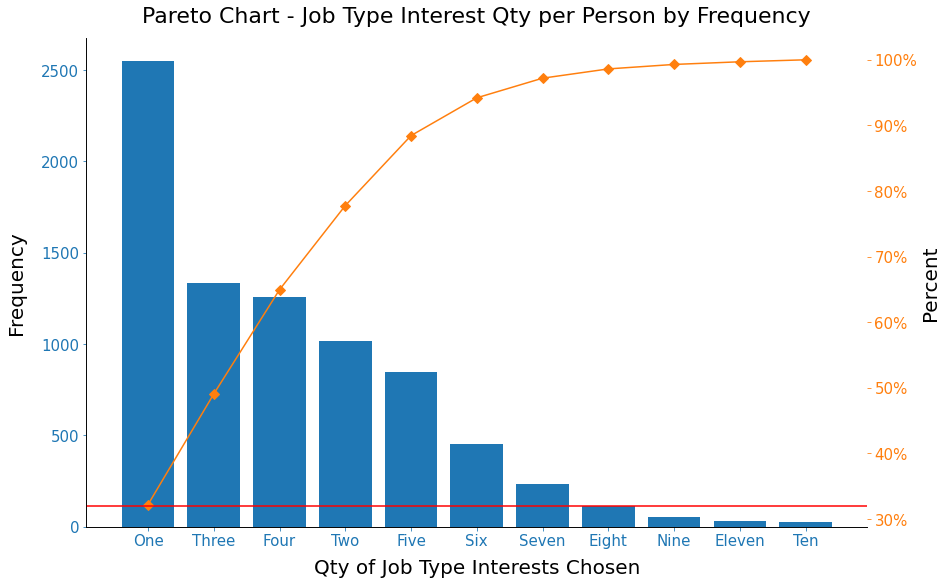

In [4]:
# use appropriate plotting commands to generate a Pareto chart.
fig, ax = plt.subplots(figsize=(14,9))
ax.bar(df12['Multi_Interests'], df12['Frequency'], color='C0')
ax2 = ax.twinx()
ax2.plot(df12['Multi_Interests'], df12['Cum_Percent'], color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.title('Pareto Chart - Job Type Interest Qty per Person by Frequency', fontsize=22, pad=15)
ax.set_xlabel('Qty of Job Type Interests Chosen', fontsize=20, labelpad = 10)

plt.xticks(fontsize=30)
ax.set_ylabel('Frequency', fontsize=20, labelpad=15)
plt.yticks(fontsize=15)
sns.despine(bottom=False)
ax.grid(False)

ax.yaxis.set_label_position('left')
ax.tick_params(axis='x', colors='C0', labelrotation=0, labelsize=15)
ax.tick_params(axis='y', colors='C0', labelsize=15)
plt.axhline(32, color='red')
ax2.tick_params(axis='y', colors='C1', labelsize = 15)
plt.ylabel('Percent', fontsize=20)
plt.show()

## Observations

The chart above tells me that just over 30% of the respondents identified one specific job type they were interested in. Everyone else chose two or more. Does that mean that about 70% weren't sure what they wanted and would depend upon further computer programming training to eventually make the choice? Not necessarily. For example, choosing the three types of Web Developer jobs may indicate the responder didn't care what type of web development job they could land: 'Back-End', 'Front-End' and 'Full-Stack'.

What I will do is look at the distribution of job type choices after splitting the multi choices into individual and then look at the distribution for cases where only one choice was made. After that, draw some conclusions if possible.

## Multi Job Type Selection Analysis

In [5]:
# define dataframe with only job type columns included.
df2 = code_survey2[cols]

# create new row to sum number of respondents interested
# in each job type from list.
df2 = df2.append(pd.Series(df2.sum(),name='Total'))

print(df2.columns, '\n')

new1 = df2.loc[['Total']]
print(new1, '\n')
# convert column names to something a little easier to decipher.
new1.columns = ['Back-End Web Developer', 'Data Engineer', 'Data Scientist',
               'DevOps', 'Front-End Web Developer', 'Full-Stack Web Developer',
               'Game Developer', 'Information Security', 'Mobile Developer',
               'Project Manager', 'Quality Assurance Engineer']

# create dataframe that includes job type interest and choice frequency of each.
df = pd.melt(new1, var_name='Job_Interest', value_name='Total')

# add column with percent value for each job type preference.
df['Percent'] = (df['Total'] / 
                  df['Total'].sum()) * 100  
df = df.sort_values(by=['Total'], ascending=False)
# calculate cumulative percent for each job type preference.
df['Cum_Percent'] = 100*(df.Total.cumsum() / df.Total.sum())
print(df)

Index(['JobInterestBackEnd', 'JobInterestDataEngr', 'JobInterestDataSci',
       'JobInterestDevOps', 'JobInterestFrontEnd', 'JobInterestFullStack',
       'JobInterestGameDev', 'JobInterestInfoSec', 'JobInterestMobile',
       'JobInterestProjMngr', 'JobInterestQAEngr'],
      dtype='object') 

       JobInterestBackEnd  JobInterestDataEngr  JobInterestDataSci  \
Total              3201.0               1470.0              1940.0   

       JobInterestDevOps  JobInterestFrontEnd  JobInterestFullStack  \
Total             1092.0               4047.0                4831.0   

       JobInterestGameDev  JobInterestInfoSec  JobInterestMobile  \
Total              1875.0              1560.0             2677.0   

       JobInterestProjMngr  JobInterestQAEngr  
Total                939.0              584.0   

                  Job_Interest   Total    Percent  Cum_Percent
5     Full-Stack Web Developer  4831.0  19.949620    19.949620
4      Front-End Web Developer  4047.0  16.712091    36.66

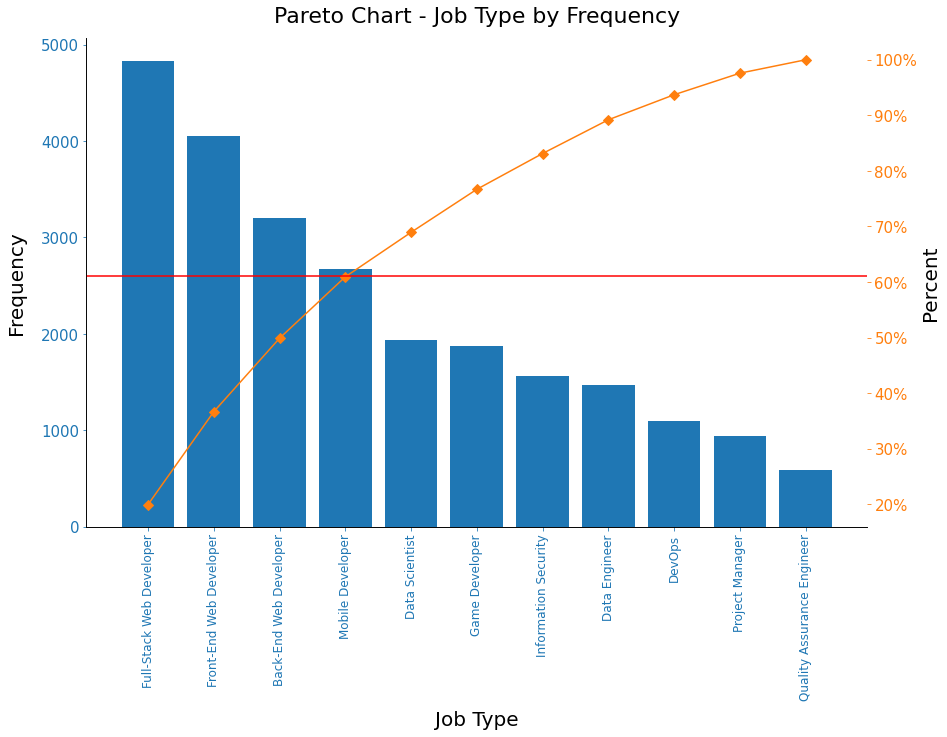

In [6]:
# use appropriate plotting commands to generate pareto chart.
fig, ax = plt.subplots(figsize=(14,9))
ax.bar(df['Job_Interest'], df['Total'], color='C0')
ax2 = ax.twinx()
ax2.plot(df['Job_Interest'], df['Cum_Percent'], color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.title('Pareto Chart - Job Type by Frequency', fontsize=22, pad=15)
ax.set_xlabel('Job Type', fontsize=20, labelpad = 10)
plt.xticks(fontsize=30)
ax.set_ylabel('Frequency', fontsize=20, labelpad=15)
plt.yticks(fontsize=22)
sns.despine(bottom=False)
ax.grid(False)

ax.yaxis.set_label_position('left')
ax.tick_params(axis='x', colors='C0', labelrotation=90, labelsize=12)
ax.tick_params(axis='y', colors='C0', labelsize=15)
plt.axhline(61, color='red')
ax2.tick_params(axis='y', colors='C1', labelsize = 15)
plt.ylabel('Percent', fontsize=20)
plt.show()

## Observations

This particular example doesn't quite follow the Pareto principle. There are only 11 variables in this case. Twenty percent of the job types is only qty. two. The first two only account for about 35% of all the job types.

It's interesting to see that the top four job preferences fall in line with our primary current courses we provide: web and mobile development. That accounts for about 60% of all the choices made by the respondents.

**That works in our favor** in this regard that we may not need to invest capital for new course development to acquire new customers. Further analysis to be done before making conclusions.

## One Job Type Selection Analysis

Let's look at the distribution of job type interests for cases where only one job type was selected by survey respondents.

In [7]:
# select only the single job type choices.
one_job_choice = code_survey2[code_survey2['Multi_Interests'] == 1.0]

one_job_choice = one_job_choice[cols]

# create new row to sum number of respondents interested in each job type from list.
df7 = one_job_choice.append(pd.Series(one_job_choice.sum(),name='Total2'))
print(df7.columns)

new2 = df7.loc[["Total2"]]
print(new2, '\n')
# convert column names to something a little easier to decipher.
new2.columns = ['Back-End Web Developer', 'Data Engineer', 'Data Scientist',
                'DevOps', 'Front-End Web Developer', 'Full-Stack Web Developer',
               'Game Developer', 'Information Security', 'Mobile Developer',
                'Project Manager', 'Quality Assurance Engineer']

# create dataframe and move row 'Total2' into column position. 
df8 = pd.melt(new2, var_name="Job_Interest", value_name="Total2")
print(df8, '\n')
df8['Percent'] = (df8['Total2'] / 
                  df8['Total2'].sum()) * 100
df8 = df8.sort_values(by=['Total2'], ascending=False)
df8['Cum_Percent'] = 100*(df8.Total2.cumsum() / df8.Total2.sum())
print(df8)

Index(['JobInterestBackEnd', 'JobInterestDataEngr', 'JobInterestDataSci',
       'JobInterestDevOps', 'JobInterestFrontEnd', 'JobInterestFullStack',
       'JobInterestGameDev', 'JobInterestInfoSec', 'JobInterestMobile',
       'JobInterestProjMngr', 'JobInterestQAEngr'],
      dtype='object')
        JobInterestBackEnd  JobInterestDataEngr  JobInterestDataSci  \
Total2               168.0                 66.0               192.0   

        JobInterestDevOps  JobInterestFrontEnd  JobInterestFullStack  \
Total2               46.0                610.0                 978.0   

        JobInterestGameDev  JobInterestInfoSec  JobInterestMobile  \
Total2               144.0               123.0              143.0   

        JobInterestProjMngr  JobInterestQAEngr  
Total2                 63.0               18.0   

                  Job_Interest  Total2
0       Back-End Web Developer   168.0
1                Data Engineer    66.0
2               Data Scientist   192.0
3                     

## Observations



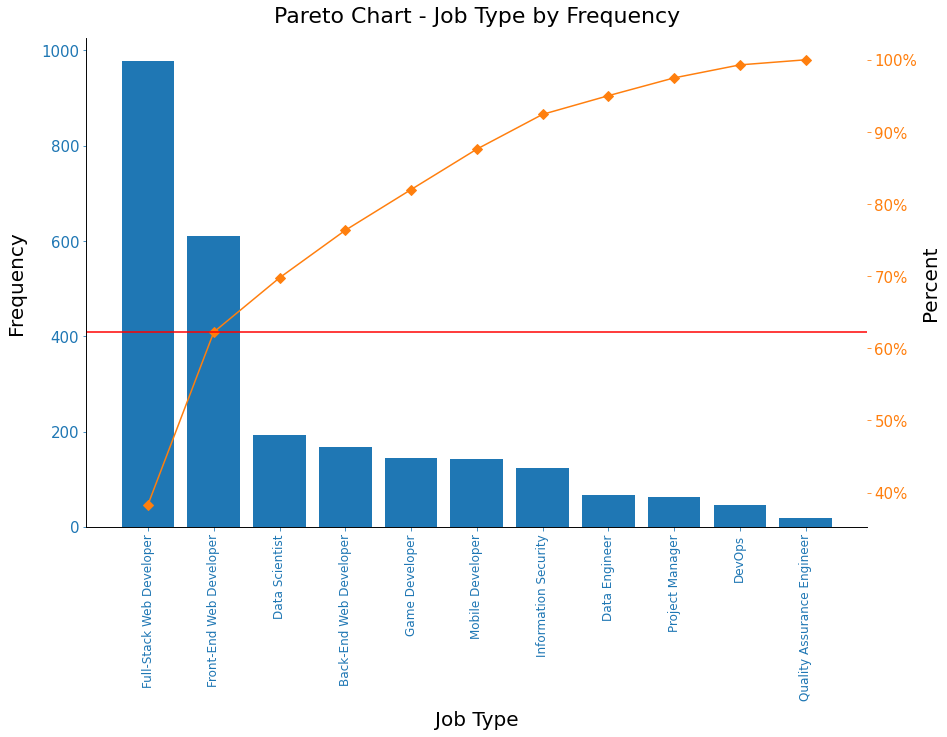

In [8]:
# use appropriate plotting commands to generate pareto chart.
fig, ax = plt.subplots(figsize=(14,9))
ax.bar(df8['Job_Interest'], df8['Total2'], color='C0')
ax2 = ax.twinx()
ax2.plot(df8['Job_Interest'], df8['Cum_Percent'], color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.title('Pareto Chart - Job Type by Frequency', fontsize=22, pad=15)
ax.set_xlabel('Job Type', fontsize=20, labelpad = 10)
plt.xticks(fontsize=30)
ax.set_ylabel('Frequency', fontsize=20, labelpad=15)
plt.yticks(fontsize=22)
sns.despine(bottom=False)
ax.grid(False)

ax.yaxis.set_label_position('left')
ax.tick_params(axis='x', colors='C0', labelrotation=90, labelsize=12)
ax.tick_params(axis='y', colors='C0', labelsize=15)
plt.axhline(62.2, color='red')
ax2.tick_params(axis='y', colors='C1', labelsize = 15)
plt.ylabel('Percent', fontsize=20)
plt.show()

## Observations

Concerning job type choices where respondents indicated only one, the results are quite close to the distribution for multiple choices. The web development jobs are in the top 3 out of 4 while Mobile development falls to sixth choice.

This chart is a little closer to following the Pareto principle. The first 2 choices account for just over 60% of the total. So, we're still looking good with our current available courses.

## Current Country Residence

In [9]:
# create frequency table for countries and qty of respondents living in each.
present_home = code_survey2['CountryLive'].value_counts(ascending=False)
focus_home = code_survey2['CountryLive'].dropna()
print(focus_home.value_counts(ascending=False), '\n')   

# convert frequency table into a dataframe.
new_df1 = pd.value_counts(focus_home).to_frame().reset_index()

# PCR stands for Present Country Residence.
new_df1.columns = ['PCR', 'Frequency']
print(new_df1, '\n')

new_df1['Cum_Percent'] = 100*(new_df1.Frequency.cumsum() / new_df1.Frequency.sum())
other = new_df1.iloc[19:137, 1].sum()
new_row3 = {'PCR':'Other', 'Frequency':1304, 'Cum_Percent':100}
new_df1 = new_df1.append(new_row3, ignore_index=True)

print(new_df1, '\n')
new_df1.at[0,'PCR']='U.S.A.'
new_df1.at[2,'PCR']='U.K.'
new_df1.at[14,'PCR']='Holland Euro'
print(new_df1)

pareto1 = new_df1[new_df1.Frequency > 42]
print(pareto1)

United States of America    3023
India                        516
United Kingdom               310
Canada                       249
Poland                       130
                            ... 
Nambia                         1
Kyrgyzstan                     1
Guatemala                      1
Panama                         1
Haiti                          1
Name: CountryLive, Length: 137, dtype: int64 

                          PCR  Frequency
0    United States of America       3023
1                       India        516
2              United Kingdom        310
3                      Canada        249
4                      Poland        130
..                        ...        ...
132                    Nambia          1
133                Kyrgyzstan          1
134                 Guatemala          1
135                    Panama          1
136                     Haiti          1

[137 rows x 2 columns] 

                          PCR  Frequency  Cum_Percent
0    United States

## Observations

I initially executed the command **<span style="color:red">\'pd.set_option('display.max_rows', None)\'</span>** so I could see at what country the cumulative percent reaches 80. My plan was then to consolidate all remaining countries into the group called \'Other\' and then plot a Pareto Graph.

There were a total of 137 countries where survey responders currently live. The top 19 countries have about 80 percent of all the responders currently living there. I consolidated the remaining 118 countries into one category labeled \'Other\'.

## Pareto Chart - Resident Country of Responders

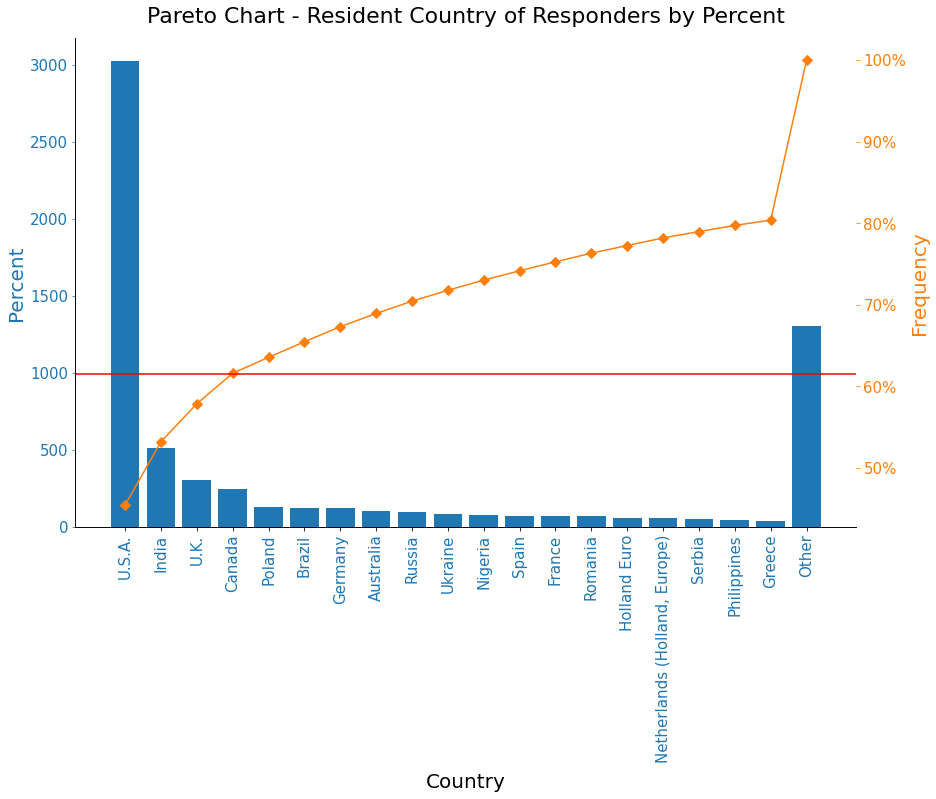

In [10]:
fig, ax = plt.subplots(figsize=(14,9))
ax.bar(pareto1['PCR'], pareto1['Frequency'], color='C0')
ax2 = ax.twinx()
ax2.plot(pareto1['PCR'], pareto1['Cum_Percent'], color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.title('Pareto Chart - Resident Country of Responders by Percent', fontsize=22, pad=15)
ax.set_xlabel('Country', fontsize=20, labelpad = 10)
plt.xlabel(None)
plt.xticks()
ax.set_ylabel('Percent', color='C0', fontsize=20)
ax2.set_ylabel('Frequency', color='C1', fontsize=20)

plt.yticks(fontsize=22)
plt.axhline(61.5, color='red', label = 'Mean')
sns.despine(bottom=False)
ax.grid(False)
ax.set_xticklabels(pareto1['PCR'], rotation=90, ha='center', color='C0', minor=False, fontsize=15)
ax.yaxis.set_label_position('left')

ax.tick_params(axis='y', colors='C0', labelsize=15)
ax2.tick_params(axis='y', colors='C1', labelsize = 15)
plt.show()

## Observations

In terms of respondent country residents, U.S.A. certainly dominates at 45% of the total among 137 countries. The top four countries, U.S.A., India, U.K. and Canada account for over 60% of the total.

This case follows the Pareto principle more closely in that 19/137 (14%) countries account for 80% of the total. 

## Country of Residence for Web and Mobile Developer Preferences

Let's find out the top countries of respondent residence that tie in with our current courses: web and mobile development only.

In [11]:
one_job_choice = code_survey2[code_survey2['Multi_Interests'] == 1.0]
print(one_job_choice.info())

Focus_cols = ['CountryLive', 'JobInterestDataSci',
        'JobInterestFrontEnd',  'JobInterestFullStack',
        'JobInterestMobile']

new_focus = one_job_choice[Focus_cols]
print(new_focus, '\n')

print(new_focus['CountryLive'].value_counts(ascending=False, dropna=False), '\n')
print(len(new_focus))
focus_home = new_focus['CountryLive'].dropna()
print(focus_home.value_counts(ascending=False))                       
print(len(focus_home))

# convert frequency table into a dataframe.
new_df = pd.value_counts(focus_home).to_frame().reset_index()

# PCR stands for Present Country Residence.
new_df.columns = ['PCR', 'Frequency']
print(new_df, '\n')

new_df['Cum_Percent'] = 100*(new_df.Frequency.cumsum() / new_df.Frequency.sum())
other = new_df.iloc[20:111, 1].sum()
new_row2 = {'PCR':'Other', 'Frequency':431, 'Cum_Percent':100}
new_df = new_df.append(new_row2, ignore_index=True)
print(new_df, '\n')

new_df.at[0,'PCR']='U.S.A.'
new_df.at[2,'PCR']='U.K.'
new_df.at[14,'PCR']='Holland Euro'

print(new_df, '\n')

pareto2 = new_df[new_df.Frequency > 14]
print(pareto2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2551 entries, 1 to 18161
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2090 non-null   float64
 1   AttendedBootcamp      2467 non-null   float64
 2   BootcampFinish        145 non-null    float64
 3   BootcampLoanYesNo     147 non-null    float64
 4   BootcampName          127 non-null    object 
 5   BootcampRecommend     148 non-null    float64
 6   CountryLive           2095 non-null   object 
 7   ExpectedEarning       2241 non-null   float64
 8   FirstDevJob           0 non-null      float64
 9   Gender                2114 non-null   object 
 10  HoursLearning         2334 non-null   float64
 11  Income                871 non-null    float64
 12  JobInterestBackEnd    168 non-null    float64
 13  JobInterestDataEngr   66 non-null     float64
 14  JobInterestDataSci    192 non-null    float64
 15  JobInterestDevOps   

## Observations

I used the \'pd.set_option("display.max_rows", 130)\' command to print every country and frequency so I could determine which countries after the cumulative 80% mark to consolidate into the group title 'Other'. I followed that command with \'pd.reset_option("display.max_rows")\' to restore maximum rows to default.

## Pareto Chart for Country of Residence (within Web and Mobile Developer Preferences)

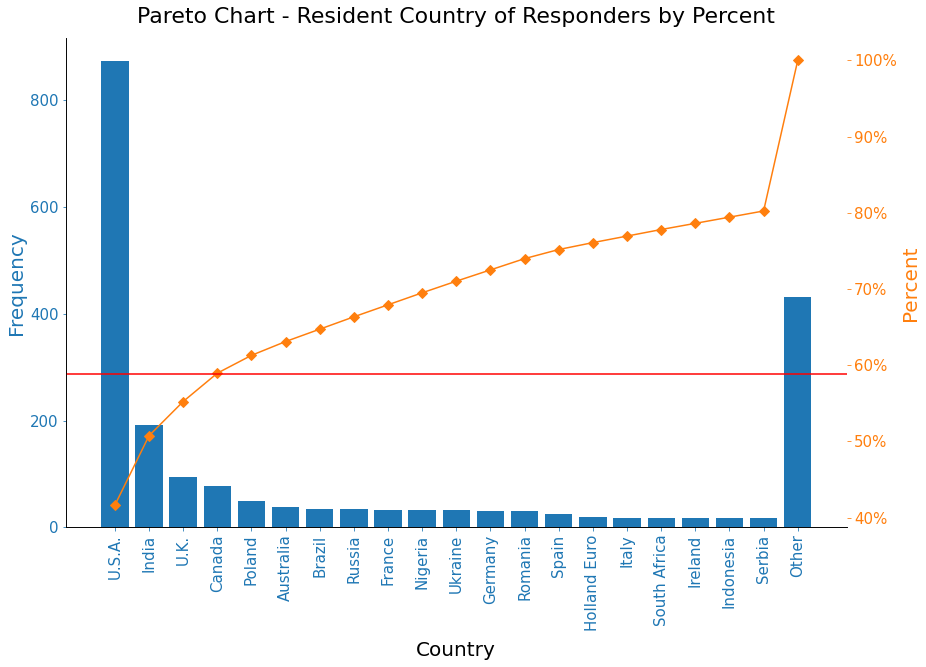

In [12]:
fig, ax = plt.subplots(figsize=(14,9))
ax.bar(pareto2['PCR'], pareto2['Frequency'], color='C0')
ax2 = ax.twinx()
ax2.plot(pareto2['PCR'], pareto2['Cum_Percent'], color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.title('Pareto Chart - Resident Country of Responders by Percent', fontsize=22, pad=15)
ax.set_xlabel('Country', fontsize=20, labelpad = 10)
plt.xticks(fontsize=30)
ax.set_ylabel('Frequency', fontsize=20, color='C0')
plt.yticks(fontsize=22)
plt.axhline(58.9, color='red', label = 'Mean')
sns.despine(bottom=False)
ax.grid(False)

ax.yaxis.set_label_position('left')
ax.tick_params(axis='x', colors='C0', labelrotation=90, labelsize=15)
ax.tick_params(axis='y', colors='C0', labelsize=15)
ax2.tick_params(axis='y', colors='C1', labelsize = 15)
plt.ylabel('Percent', fontsize=20, color='C1')
plt.show()

## Observations

Regarding the web and mobile development job type preferences, the same top four countries are where the respondents currently live. At this point of the analysis, these countries are the leading candidates for top four marketing areas. I still need to narrow it down to two.

## Money Spent by Survey Responders on Computer Programming Training

Code academies (also called coding bootcamps) are expensive. Tuition ranges from \\$5000 to more than \\$20,000 for 8-24 weeks of study. According to the academies and their fans, this is a great deal compared to university programs, which cost more and take longer to complete.

The **\'MoneyForLearning\'** column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of \\$59 per month, and for this reason we're interested in finding out how much money each student spends per month.

In [13]:
print(code_survey2['MonthsProgramming'].value_counts().sort_index())
print('\n')
print(code_survey2['AttendedBootcamp'].value_counts().sort_index(), '\n')

# determine monthly spending rates for 1 month training indoviduals. 
zero_months = code_survey2[code_survey2['MonthsProgramming'] == 0.0]
zero_months.loc[zero_months['MonthsProgramming'] == 0.0, ['MonthsProgramming']] = 1.0
print(zero_months.info(), '\n')
zero_months['MonthlySpending'] = zero_months['MoneyForLearning'] / zero_months['MonthsProgramming']
print(zero_months['MonthlySpending'].value_counts().sort_index(), '\n')

# determine monthly spending rates for boot camp attendees.
boot_camp = code_survey2[code_survey2['AttendedBootcamp'] == 1]
print(boot_camp['MoneyForLearning'].value_counts().sort_index(), '\n')
boot_camp.loc[boot_camp['MonthsProgramming'] == 0.0, ['MonthsProgramming']] = 1.0
boot_camp['MonthlySpending'] = boot_camp['MoneyForLearning'] / boot_camp['MonthsProgramming']

code_survey2.loc[code_survey2['MonthsProgramming'] == 0.0, ['MonthsProgramming']] = 1.0
print(code_survey2['MonthsProgramming'].value_counts().sort_index(), '\n')

code_survey2['MonthlySpending'] = code_survey2['MoneyForLearning'] / code_survey2['MonthsProgramming']
print(code_survey2['MonthlySpending'].value_counts(dropna=False), '\n')   

code_survey3 = code_survey2[code_survey2['MonthlySpending'] != 0]
code_survey4 = code_survey3.dropna(axis=0, subset=['MonthlySpending'])
print(code_survey4['CountryLive'].value_counts(ascending=False, dropna=False), '\n')

code_survey5 = code_survey4.dropna(axis=0, subset=['CountryLive'])
print(code_survey5['CountryLive'].value_counts(ascending=False, dropna=False), '\n')

0.0      276
1.0      848
2.0      736
3.0      706
4.0      395
        ... 
360.0      4
370.0      1
408.0      1
480.0      2
744.0      3
Name: MonthsProgramming, Length: 95, dtype: int64


0.0    7341
1.0     423
Name: AttendedBootcamp, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 234 to 18157
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   217 non-null    float64
 1   AttendedBootcamp      273 non-null    float64
 2   BootcampFinish        2 non-null      float64
 3   BootcampLoanYesNo     2 non-null      float64
 4   BootcampName          2 non-null      object 
 5   BootcampRecommend     2 non-null      float64
 6   CountryLive           213 non-null    object 
 7   ExpectedEarning       243 non-null    float64
 8   FirstDevJob           0 non-null      float64
 9   Gender                216 non-null    object 
 10  HoursLearning   

## Observations

**Insufficient Communication:** Senior marketing management did not inform me whether they are prepared to introduce new type of e-learning training valued at \\$100, \\$200, \\$1000,  or more per month; especially "Boot Camp" type training. 

I noticed that qty. 423 of the survey responders attended \'boot camp\' type training. I will look at the distribution of monthly spending from these responders to determine if that data should be removed.

There are also responders who reported their months of training as zero. I need to view that data and after converting the value to 1 from 0 (to at least indicate one month of training) decide whether to include or exclude that data.

**It's nice to have lots of data! But not if it includes questionable values that have great potential to distort the outcome!**

## Monthly Spending Across All Survey Responders

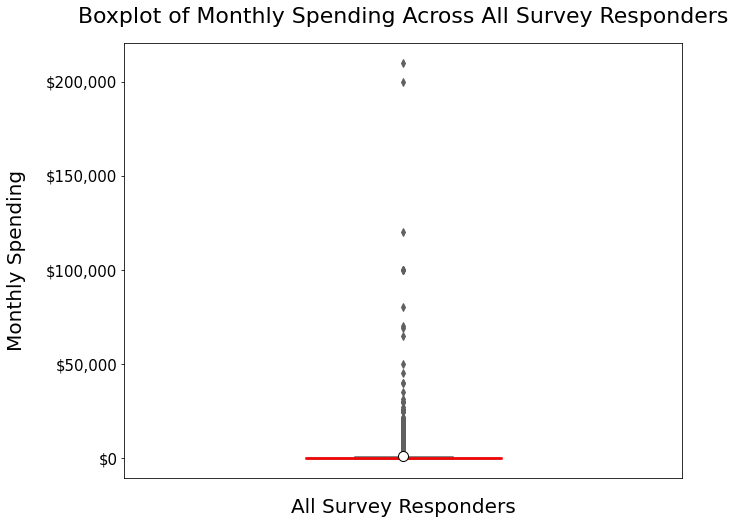

In [14]:
# create a dataframe containing for money spent for all individuals.
df = pd.DataFrame(columns = ['money_spent'])
df['money_spent'] = code_survey2['MoneyForLearning']

# use Seaborn coding to generate box and whisker plot. 
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, width = 0.35, linewidth=2.5, palette='Blues',
            showmeans=True, medianprops={'color':'red'}, meanprops={'marker':'o',
            'markerfacecolor':'white', 'markeredgecolor':'black',
            'markersize':'10'})
plt.title('Boxplot of Monthly Spending Across All Survey Responders', fontsize=22, pad=20)
plt.xlabel('All Survey Responders', fontsize=20, labelpad = 20)
plt.yticks(fontsize=15)
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylabel('Monthly Spending', fontsize=20, labelpad = 20)
plt.show()

## Observations

A couple of individuals have spent over $200000 per month for their training. Really?!! It may take them a long time to earn back what they've invested in training. Hopefully they'll live another 100 years to break even.

**<span style="color:blue">Executive Decision Time:</span>** Since the marketing senior managers are not available to obtain more details, I will have to make an executive decision on what a reasonable maximum monthly spending rate is to exclude: \\$5000, \\$500, \\$100, ...?

I haven't yet generated a box and whisker plot that shows monthly spending being unreasonably too **LOW** to fit our spectrum of available courses. More to come.



## Months of Learning_Training

Regarding the column title **\'MonthsProgramming\'**, I can't necessarily conclude that it truly means months of learning by training or months of learning by experience. I will assume it means months of training.

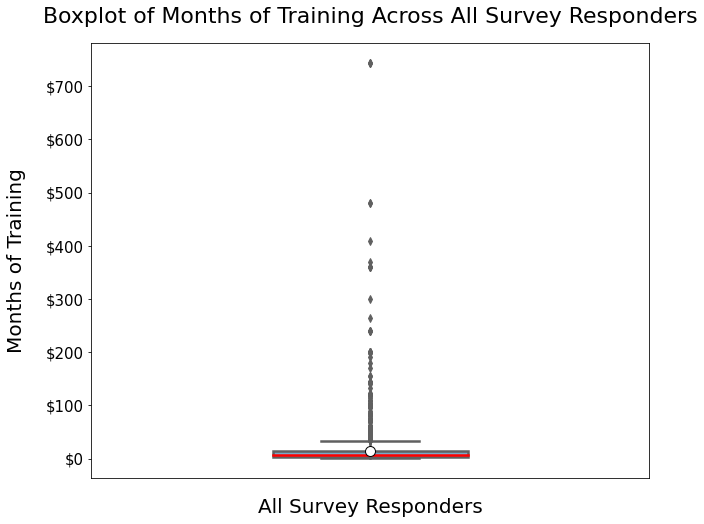

In [15]:
df = pd.DataFrame(columns = ['months_training'])
df['months_training'] = code_survey2['MonthsProgramming']

# use Seaborn coding to generate box and whisker plot. 
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, width = 0.35, linewidth=2.5, palette='Blues',
            showmeans=True, medianprops={'color':'red'}, meanprops={'marker':'o',
            'markerfacecolor':'white', 'markeredgecolor':'black',
            'markersize':'10'})
plt.title('Boxplot of Months of Training Across All Survey Responders', fontsize=22, pad=20)
plt.xlabel('All Survey Responders', fontsize=20, labelpad = 20)
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.yticks(fontsize=15)
plt.ylabel('Months of Training', fontsize=20, labelpad = 20)
plt.show()

## Observations

There definitely are some crazy numbers for months of training by various survey responders. Someone who showed they've had over 700 months (> 58 years) of training so far. Really?!! I don't think so.

**<span style="color:blue">Executive Decision Time:</span>** Again I will need to make an executive decision on maximum number of months to include in the final trimmed data file.

## Boot Camp Training Monthly Rates

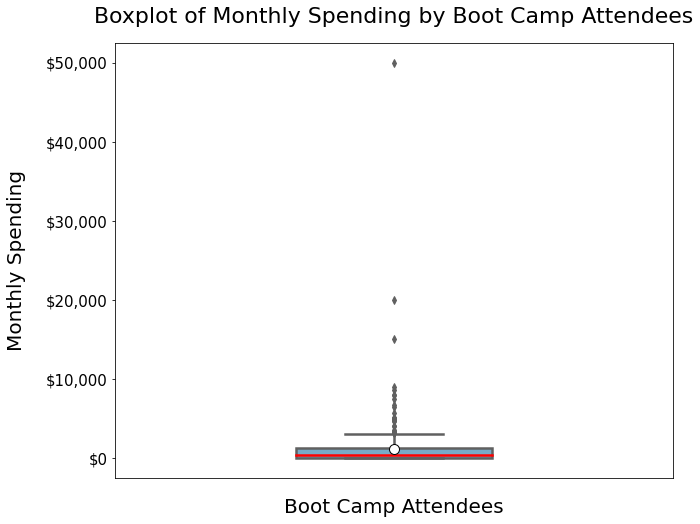

In [16]:
df = pd.DataFrame(columns = ['boot_camp'])
df['boot_camp'] = boot_camp['MonthlySpending']

# use Seaborn coding to generate box and whisker plot. 
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, width = 0.35, linewidth=2.5, palette='Blues',
            showmeans=True, medianprops={'color':'red'}, meanprops={'marker':'o',
            'markerfacecolor':'white', 'markeredgecolor':'black',
            'markersize':'10'})

plt.title('Boxplot of Monthly Spending by Boot Camp Attendees', fontsize=22, pad=20)
plt.xlabel('Boot Camp Attendees', fontsize=20, labelpad = 20)
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.yticks(fontsize=15)
plt.ylabel('Monthly Spending', fontsize=20, labelpad = 20)
plt.show()

## Boot Camp Decision

As I expected, the boot camp monthly spending rates are quite high relative to $59 per month.

**<span style="color:blue">Executive Decision Time:</span>** I'm going to assume that senior management is not interested in developing boot camp type training in the immediate future. I will exclude this group of data.

## One Month or Less Trained Students

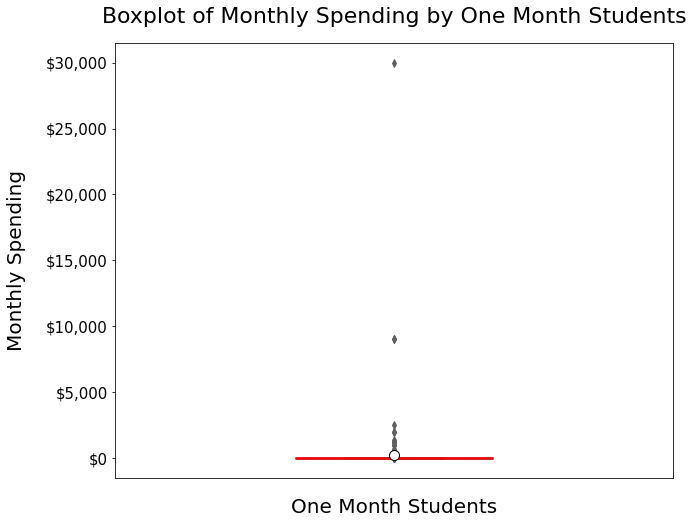

In [17]:
df = pd.DataFrame(columns = ['zero_months'])
df['zero_months'] = zero_months['MonthlySpending']

# use Seaborn coding to generate box and whisker plot. 
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, width = 0.35, linewidth=2.5, palette='Blues',
            showmeans=True, medianprops={'color':'red'}, meanprops={'marker':'o',
            'markerfacecolor':'white', 'markeredgecolor':'black',
            'markersize':'10'})

plt.title('Boxplot of Monthly Spending by One Month Students', fontsize=22, pad=20)
plt.xlabel('One Month Students', fontsize=20, labelpad = 20)
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.yticks(fontsize=15)
plt.ylabel('Monthly Spending', fontsize=20, labelpad = 20)
plt.show()

## Decision

In the project guidelines, it was suggested that I convert the months of training cases that show 0 to 1 to represent at least 1 month of training. The primary reason for this suggestion is when calculating monthly spending, there would be a problem for the cases where the denominator was 0.

So, having done that, we see suspect monthly spending rates here for students that have had one month or less of training.

Not only that, **<span style="color:red">here's the concern I have</span>** for these cases and possibly even cases where students have had less than 12 months of training. Among the survey responders, I'm sure there are individuals who made the full payment up front, whether it's a one year subscription or full course subscription or whatever. So, when dividing that total payment by 1 month, 2 or ... less than 12, it will generate an inflated monthly payment. I don't think the data file tells us who made full year or more course payments among all the survey responders.

I'm beginning to feel like monthly spending on training should not be used in making a final decision on the top two marketing areas.

## Determine Unreasonable Low Monthly Spending Rates

I will generate a box and whisker plot with an upper limit equal to our current monthly subscription rate: \\$59 per month.

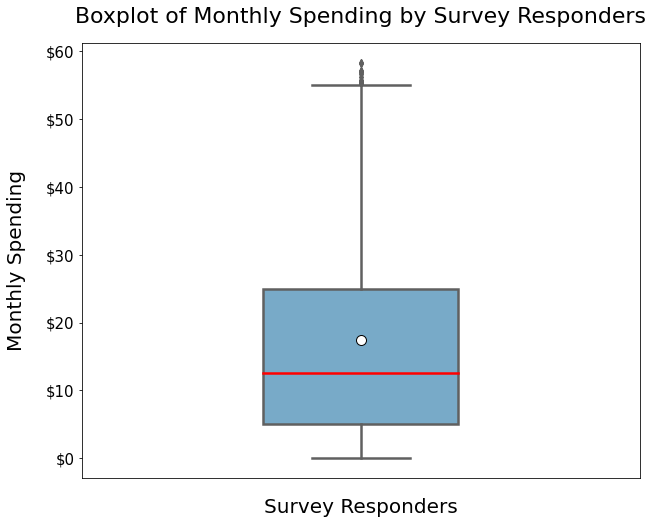

In [18]:
low_data = code_survey5[(code_survey5['MonthlySpending'] < 60.00)]
df = pd.DataFrame(columns = ['likely'])
df['likely'] = low_data['MonthlySpending']

# use Seaborn coding to generate box and whisker plot. 
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, width = 0.35, linewidth=2.5, palette='Blues',
            showmeans=True, medianprops={'color':'red'}, meanprops={'marker':'o',
            'markerfacecolor':'white', 'markeredgecolor':'black',
            'markersize':'10'})

plt.title('Boxplot of Monthly Spending by Survey Responders', fontsize=22, pad=20)
plt.xlabel('Survey Responders', fontsize=20, labelpad = 20)
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.yticks(fontsize=15)
plt.ylabel('Monthly Spending', fontsize=20, labelpad = 20)
plt.show()

## Observations

Of all the cases where monthly spending is less than \\$59, at least 75\% are lower than about \\$25. I will now decide what the upper and lower monthly spending rates are acceptable to marketing senior management.

## What Monthly Spending is Reasonable to Include?

**<span style="color:blue">Final Executive Decision:!!</span>** On behalf of marketing senior management, I'm going to set the maximum monthly subscription rate at \\$200 and the minimum monthly subscription rate at our current one which is \\$59 per month. This will get rid of months of programming values set at 1 which yield unreasonable monthly spending.

Let's see what these limits look like for each of the top four countries.

In [19]:
# define the upper and lower monthly spending limits.
likely_data2 = code_survey5[(code_survey5['MonthlySpending'] < 200.00) & (code_survey5['MonthlySpending'] > 59.00)]

likely_data2['MonthlySpending'] = likely_data2['MoneyForLearning'] / likely_data2['MonthsProgramming']

top_four = likely_data2.loc[((likely_data2['CountryLive'] == 'United States of America')
                             | (likely_data2['CountryLive'] == 'India')
                             | (likely_data2['CountryLive'] == 'United Kingdom')
                             | (likely_data2['CountryLive'] == 'Canada'))]

print(top_four['CountryLive'].value_counts(), '\n')
avg_by_country = top_four.groupby('CountryLive')['MonthlySpending'].mean()
print(avg_by_country)

United States of America    285
India                        36
United Kingdom               28
Canada                       15
Name: CountryLive, dtype: int64 

CountryLive
Canada                      100.619048
India                       119.141534
United Kingdom              100.364100
United States of America    105.768501
Name: MonthlySpending, dtype: float64


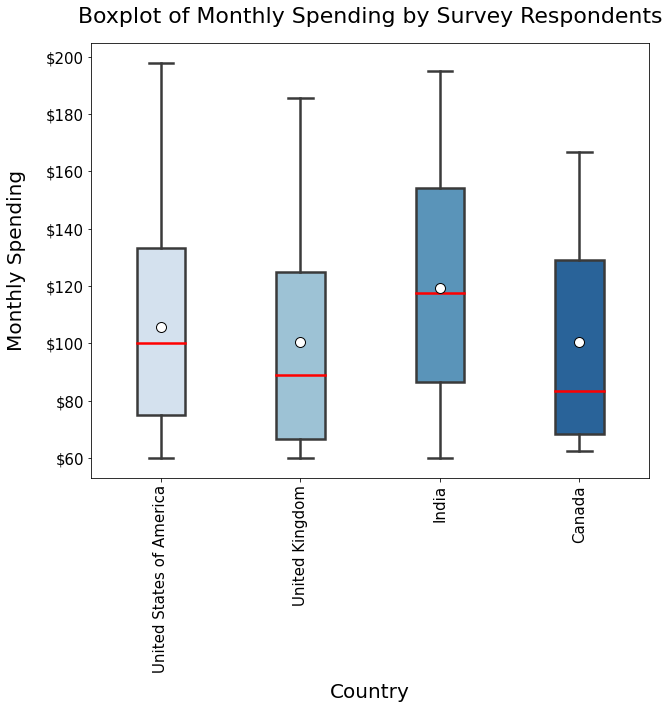

In [20]:
# use Seaborn coding to generate box and whisker plot. 
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x = top_four['CountryLive'], y = top_four['MonthlySpending'], width = 0.35, linewidth=2.5, palette='Blues',
            showmeans=True, medianprops={'color':'red'}, meanprops={'marker':'o',
            'markerfacecolor':'white', 'markeredgecolor':'black',
            'markersize':'10'})

plt.title('Boxplot of Monthly Spending by Survey Respondents', fontsize=22, pad=20)
ax.yaxis.set_label_position("left")
ax.tick_params(axis='x', labelrotation=90, labelsize=15)
ax.tick_params(axis='y', labelsize=15)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('Country', fontsize=20, labelpad = 10) 
plt.ylabel('Monthly Spending', fontsize=20, labelpad = 20)
plt.show()

## Observations

After all the data cleaning for monthly spending, there's very little data remaining. It is what it is.

So with what we've have, there's very little difference in average monthly spending rate among the top four countries; not enough to impact the final decision regarding the top two regions to advertise in from a monthly spending standpoint.

- U.S.A. - \\$105.77
- U.K. - \\$100.36
- India - \\$119.14
- Canada - \\$100.62

Since our courses are set up at the moment only in English, I think that will eliminate India as a recommendation for now. If large differences in time zones is potentially a negative for our business interactions with clients, then I think that eliminates the U.K. as well.

That leaves U.S.A. and Canada as my two top markets I will recommend to advertise in.

# Conclusions

When the marketing management team gets back from training, I will make a ten minute presentation and say results from the survey analysis are inconclusive in terms of determining the top two markets for advertising.

At the same time I will say that choosing U.S.A. and Canada to launch their advertising blitz in would be low risk for poor return on investment.

I will also express appreciation for their decision to take a week long training session on communication so that for the next project assignment, they will provide me with a lot more detail, thus relieving me of making any executive decisions on their behalf.